stp1:加载数据与初步观察

In [2]:
#导入需要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#设置显示选项，让pandas输出更友好?
pd.set_option('display.max_columns',None)
#加载主训练数据，'../data/...'表示从notebook现在的文件夹返回到上一级，在进入data文件夹
app_train=pd.read_csv('../data/application_train.csv')
#查看数据前五行，对数据有个大概的直观概念和感受
print('数据前五行：')
display(app_train.head())
#查看数据的基础信息，包括形状、列数、非空值数量和数据类型
print("数据基础信息:")
app_train.info()
#查看数据维度
print(f"\n数据维度是{app_train.shape}")

数据前五行：


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

数据基础信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB

数据维度是(307511, 122)


理解目标变量tagret variables。（目标是预测target这一列，1表示违约，0表示不没有违约）

目标变量分布：
TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64


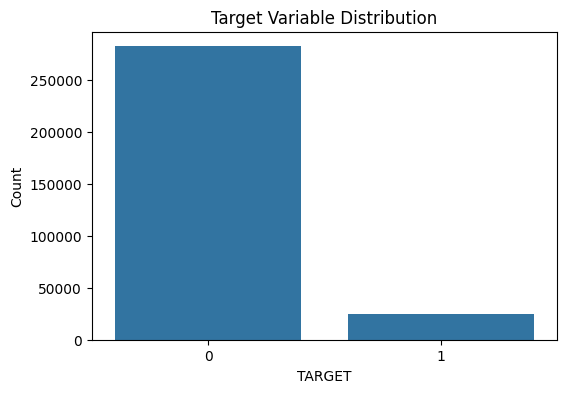

In [3]:
#查看目标变量的分布
target_counts=app_train['TARGET'].value_counts(normalize=True)*100
print("目标变量分布：")
print(target_counts)
#使用seaborn进行可视化
plt.figure(figsize=(6,4))
sns.countplot(x='TARGET',data=app_train)
plt.title('Target Variable Distribution')
plt.ylabel('Count')
plt.show()


分析缺失值。由于发现很多列的缺失值比例很高（超过50%），分析缺失值后为下一步数据清洗做准备，不能用如此高比例缺失值的列做分析。

In [ ]:
#计算每列缺失值的百分比
def missing_values_table(df):
    mis_val=df.isnull().sum()#计算每列缺失值的数量
    mis_val_percent=100*mis_val/len(df)
    mis_val_table=pd.concat([mis_val,mis_val_percent],axis=1)#将缺失值数量和百分比拼接在一起,concat是拼接函数
    mis_val_table_ren_columns=mis_val_table.rename(columns={0:'Missing Values',1:'% of Total Values'})#重命名列名,是为了 ？
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    print("您的数据框有"+str(df.shape[1])+"列。\n 其中有"+str(mis_val_table_ren_columns.shape[0])+"列含有缺失值。")
    return mis_val_table_ren_columns
#查看缺失值情况
missing_values=missing_values_table(app_train)#
print("\n缺失值最多的前20列:")
display(missing_values.head(20))








您的数据框有122列。
 其中有67列含有缺失值。

缺失值最多的前20列:


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


探索关键特征，寻找和目标特征之间的关系。通过可视化，可以直观地发现一些规律。比如，可能会发现低收入人群的违约概率（橙色线）相对更高一些。EDA就是这样不断地提出假设，然后用图表来验证的过程。

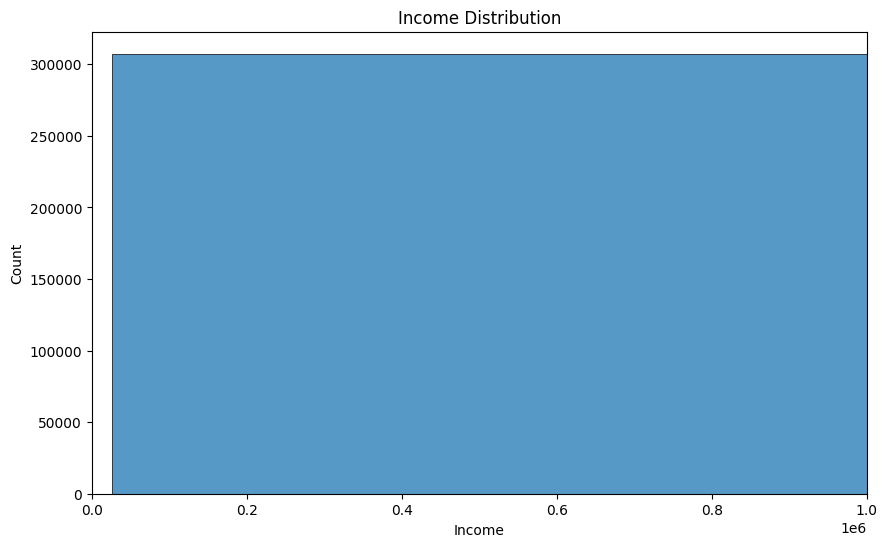

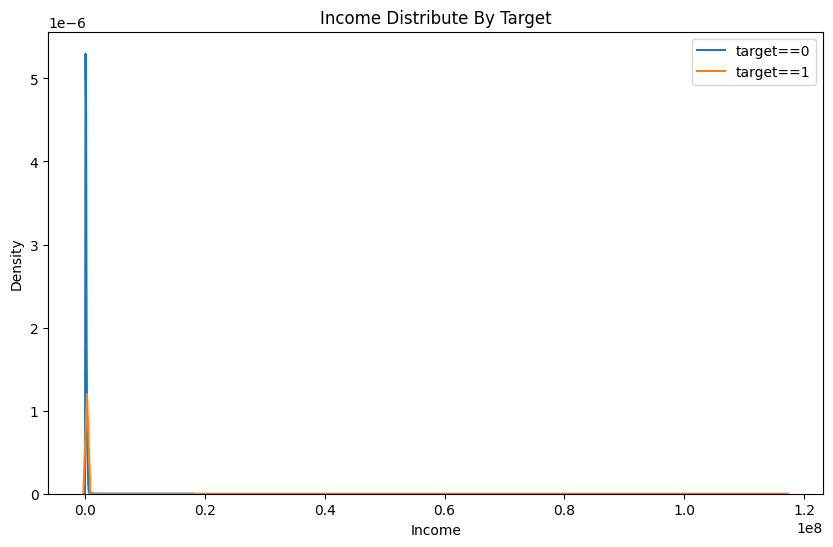

In [ ]:
#客户收入分布
plt.figure(figsize=(10, 6))#设置画布大小
#sns.histplot(app_train['AMT_INCOME_TOTAL'], bins=100, kde=False)#绘制直方图,其中kde=False表示不绘制核密度估计曲线，bins表示直方图的柱子数量
sns.histplot(data=app_train, x='AMT_INCOME_TOTAL', bins=100, kde=False)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.xlim(0, 1000000) # 限制x轴范围，让图形更清晰
plt.show()


#客户收入和是否违约的关系
plt.figure(figsize=(10,6))
sns.kdeplot(app_train.loc[app_train['TARGET']==0,'AMT_INCOME_TOTAL'],label='target==0')
sns.kdeplot(app_train.loc[app_train['TARGET']==1,'AMT_INCOME_TOTAL'],label='target==1')
plt.title('Income Distribute By Target')
plt.xlabel('Income')
plt.legend()
plt.show()

基于最简单的数据特征，建立基本模型，基准AUC，用于后续训练模型比较。

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
#1.选择最简单的，缺失值最少的数据
features=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','DAYS_BIRTH']
target='TARGET'
#创建一个只包含上述目标和特征的新的DataFrame
baseline_df=app_train[features+[target]].copy()
#处理缺失值，用中位数填充
for col in features:
    median_val = baseline_df[col].median()
    baseline_df[col] = baseline_df[col].fillna(median_val)
    
#准备数据
X=baseline_df[features]
y=baseline_df[target]

#划分测试集与训练集
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
#训练逻辑回归模型
lr=LogisticRegression()
lr.fit(X_train,y_train)
#在测试集上进行预测（用概率）
y_pre_proba=lr.predict_proba(X_test)[:,1]

#计算AUC
auc=roc_auc_score(y_test,y_pre_proba)
print(f"首次简单建立的模型的AUC是:{auc:.4f}")


首次简单建立的模型的AUC是:0.5837
